In [3]:
# Cell 1: Setup and imports
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Set style for prettier plots
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

print("✅ Setup complete! Ready to build our credit approval system.")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
✅ Setup complete! Ready to build our credit approval system.


In [4]:
# Cell 2: Generate sample credit data for our fictional bank
np.random.seed(42)  # For reproducibility - same data each time we run

# Number of customers in our historical data (10-15 years worth)
n_samples = 500

print("Generating historical credit data from our fictional bank...")
print(f"Creating data for {n_samples} pasts customers (2010-2024)...")

# Feature 1: Annual Income (in dollars)
# Range: $20,000 to $150,000 (realistic salary range)
annual_income = np.random.uniform(20000, 150000, n_samples)

# Feature 2: Credit Score
# Range: 300 to 850 (typical credit score range)
credit_score = np.random.uniform(300, 850, n_samples)

# Feature 3: Years Employed
# Range: 0.5 to 25 years (recent graduates to seasoned professionals)
years_employed = np.random.uniform(0.5, 25, n_samples)

# Feature 4: Current Debt (in dollars)
# Range: $0 to $80,000 (credit cards, car loans, etc.)
current_debt = np.random.uniform(0, 80000, n_samples)

print(" Generated 4 features for each customer:")
print(f" - Annual Income: ${annual_income.min():,.0f} to ${annual_income.max():,.0f}")
print(f" - Credit Score: {credit_score.min():.0f} to {credit_score.max():.0f}")
print(
    f" - Years Employed: {years_employed.min():.1f} to {years_employed.max():.1f} years"
)
print(f" - Current Debt: ${current_debt.min():,.0f} to ${current_debt.max():,.0f}")

Generating historical credit data from our fictional bank...
Creating data for 500 pasts customers (2010-2024)...
 Generated 4 features for each customer:
 - Annual Income: $20,658 to $149,085
 - Credit Score: 303 to 850
 - Years Employed: 0.6 to 25.0 years
 - Current Debt: $257 to $79,868


In [5]:
# Cell 3: Create approval decisions based on a realistic rule
print("\n Creating historical approval/denial decisions ...\n")

# Create a simple bu realistic decision rule
# Good candidates have: high income, high credit score, long employment, low debt

# Let's create a "credit worthiness score" based on these factors
# We'll normalize each factor to contribute fairly

# Income contribution (higher is better) - normalized to 0-100
income_score = (
    (annual_income - annual_income.min())
    / (annual_income.max() - annual_income.min())
    * 100
)

# Credit sscore contribution (higher is better) - already roughly 0-100 scale
credit_score_normalized = (credit_score - 300) / (850 - 300) * 100

# Employment contribution (longer is better) - normalized to 0-100
employment_score = (
    (years_employed - years_employed.min())
    / (years_employed.max() - years_employed.min())
    * 100
)

# Debt contribution (lower is better) - inverted and normalized to 0-100
debt_score = 100 - (
    (current_debt - current_debt.min())
    / (current_debt.max() - current_debt.min())
    * 100
)

# Weighted average - bank weights credit score and income most heavily
creditworthiness = (
    0.35 * income_score  # 35% weight to income
    + 0.35 * credit_score_normalized  # 35% weight to credit score
    + 0.15 * employment_score  # 15% weight to employment length
    + 0.15 * debt_score  # 15% weight to low debt
)

# Decision threshold: approve if creditworthiness > 60
# This gives us a roughly balanced dataset
approval_raw = (creditworthiness > 50).astype(int)

# Convert to -1 (denied) and +1 (approved) for perceptron
# This is the standard format for binary classification
approval = np.where(approval_raw == 1, 1, -1)

# Count approvals and denials
n_approved = np.sum(approval == 1)
n_denied = np.sum(approval == -1)

print("✅ Decisions created:")
print(f"   ✓ Approved: {n_approved} customers ({n_approved/n_samples*100:.1f}%)")
print(f"   ✗ Denied: {n_denied} customers ({n_denied/n_samples*100:.1f}%)")
print("\n💡 Note: We use +1 for approved, -1 for denied (perceptron convention)")


 Creating historical approval/denial decisions ...

✅ Decisions created:
   ✓ Approved: 248 customers (49.6%)
   ✗ Denied: 252 customers (50.4%)

💡 Note: We use +1 for approved, -1 for denied (perceptron convention)


In [6]:
# Cell 4: Create a pandas DataFrame for easy viewing and manipulation
print("\n📊 Creating organized dataset...\n")

# Create the DataFrame
credit_data = pd.DataFrame(
    {
        "income": annual_income,
        "credit_score": credit_score,
        "years_employed": years_employed,
        "current_debt": current_debt,
        "approval": approval,
    }
)

# Add a human-readable approval column
credit_data["decision"] = np.where(credit_data["approval"] == 1, "Approved", "Denied")

print("✅ Dataset created!")
print(
    f"\nDataset shape: {credit_data.shape[0]} customers × {credit_data.shape[1]} columns"
)
print("\nFirst 10 customers:")
print(credit_data.head(10))

print("\n" + "=" * 77)
print("SUMMARY STATISTICS")
print("=" * 77)
print(credit_data.describe())


📊 Creating organized dataset...

✅ Dataset created!

Dataset shape: 500 customers × 6 columns

First 10 customers:
          income  credit_score  years_employed  current_debt  approval  \
0   68690.215450    683.988943        5.035757  41526.542811        -1   
1  143592.859833    594.853001       13.776573  38334.550210         1   
2  115159.212435    470.240189       21.887173   2051.365265         1   
3   97825.602946    747.587261       18.439510  27299.826210         1   
4   40282.423258    676.602145       20.260748  30415.649503         1   
5   40279.287644    389.439317       16.640192  31905.822472        -1   
6   27550.869582    801.009951       17.460776  46413.789538         1   
7  132602.898951    752.395484       21.305293  42688.203738         1   
8   98144.951527    822.389952        6.616866  48632.407423         1   
9  112049.435113    699.145730       12.490912  61190.660923         1   

   decision  
0    Denied  
1  Approved  
2  Approved  
3  Approved  


📈 Creating visualizations...



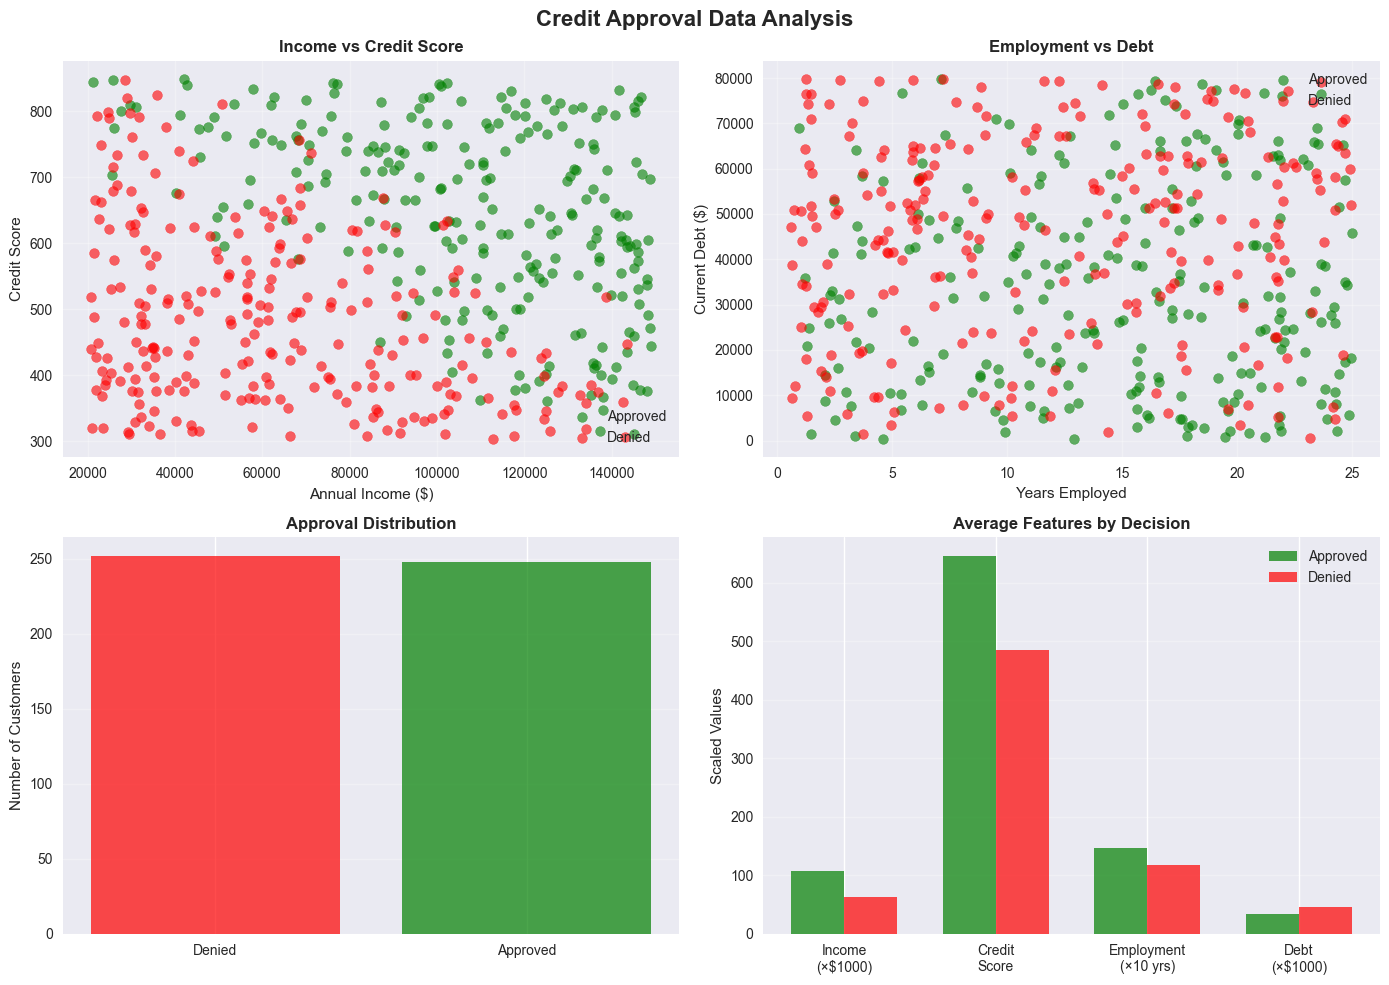

✅ Visualizations complete!

💡 Notice: Approved customers generally have higher income, better credit scores,
   longer employment, and lower debt compared to denied customers.


In [8]:
# Cell 5: Visualize our data to understand it better
print("\n📈 Creating visualizations...\n")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Credit Approval Data Analysis", fontsize=16, fontweight="bold")

# Plot 1: Income vs Credit Score
ax1 = axes[0, 0]
approved = credit_data[credit_data["approval"] == 1]
denied = credit_data[credit_data["approval"] == -1]

ax1.scatter(
    approved["income"],
    approved["credit_score"],
    c="green",
    alpha=0.6,
    label="Approved",
    s=50,
)
ax1.scatter(
    denied["income"], denied["credit_score"], c="red", alpha=0.6, label="Denied", s=50
)
ax1.set_xlabel("Annual Income ($)", fontsize=11)
ax1.set_ylabel("Credit Score", fontsize=11)
ax1.set_title("Income vs Credit Score", fontweight="bold")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Years Employed vs Debt
ax2 = axes[0, 1]
ax2.scatter(
    approved["years_employed"],
    approved["current_debt"],
    c="green",
    alpha=0.6,
    label="Approved",
    s=50,
)
ax2.scatter(
    denied["years_employed"],
    denied["current_debt"],
    c="red",
    alpha=0.6,
    label="Denied",
    s=50,
)
ax2.set_xlabel("Years Employed", fontsize=11)
ax2.set_ylabel("Current Debt ($)", fontsize=11)
ax2.set_title("Employment vs Debt", fontweight="bold")
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Distribution of approvals
ax3 = axes[1, 0]
approval_counts = credit_data["decision"].value_counts()
ax3.bar(
    approval_counts.index, approval_counts.values, color=["red", "green"], alpha=0.7
)
ax3.set_ylabel("Number of Customers", fontsize=11)
ax3.set_title("Approval Distribution", fontweight="bold")
ax3.grid(True, alpha=0.3, axis="y")

# Plot 4: Feature distributions
ax4 = axes[1, 1]
feature_means_approved = approved[
    ["income", "credit_score", "years_employed", "current_debt"]
].mean()
feature_means_denied = denied[
    ["income", "credit_score", "years_employed", "current_debt"]
].mean()

x = np.arange(4)
width = 0.35
ax4.bar(
    x - width / 2,
    [
        feature_means_approved["income"] / 1000,
        feature_means_approved["credit_score"],
        feature_means_approved["years_employed"] * 10,
        feature_means_approved["current_debt"] / 1000,
    ],
    width,
    label="Approved",
    color="green",
    alpha=0.7,
)
ax4.bar(
    x + width / 2,
    [
        feature_means_denied["income"] / 1000,
        feature_means_denied["credit_score"],
        feature_means_denied["years_employed"] * 10,
        feature_means_denied["current_debt"] / 1000,
    ],
    width,
    label="Denied",
    color="red",
    alpha=0.7,
)
ax4.set_ylabel("Scaled Values", fontsize=11)
ax4.set_title("Average Features by Decision", fontweight="bold")
ax4.set_xticks(x)
ax4.set_xticklabels(
    ["Income\n(×$1000)", "Credit\nScore", "Employment\n(×10 yrs)", "Debt\n(×$1000)"]
)
ax4.legend()
ax4.grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

print("✅ Visualizations complete!")
print(
    "\n💡 Notice: Approved customers generally have higher income, better credit scores,"
)
print("   longer employment, and lower debt compared to denied customers.")